<a href="https://colab.research.google.com/github/Ritoke/Python/blob/main/ML_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Classification

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving breast-cancer-wisconsin.data to breast-cancer-wisconsin.data


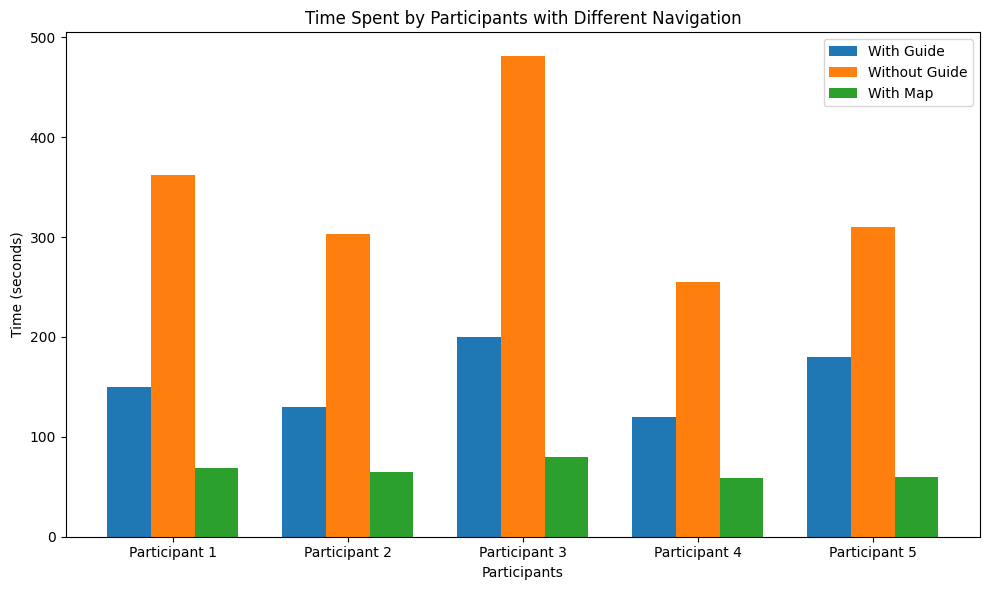

In [ ]:
import matplotlib.pyplot as plt

# Participant data
participants = ['Participant 1', 'Participant 2', 'Participant 3', 'Participant 4', 'Participant 5']
with_guide = [150, 130, 200, 120, 180]  # Time in seconds
without_guide = [362, 303, 481, 255, 310]  # Time in seconds
with_map = [69, 65, 80, 59, 60]  # Time in seconds

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.25
index = range(len(participants))

plt.bar(index, with_guide, bar_width, label='With Guide')
plt.bar([i + bar_width for i in index], without_guide, bar_width, label='Without Guide')
plt.bar([i + 2 * bar_width for i in index], with_map, bar_width, label='With Map')

plt.xlabel('Participants')
plt.ylabel('Time (seconds)')
plt.title('Time Spent by Participants with Different Navigation')
plt.xticks([i + bar_width for i in index], participants)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving car.data to car.data


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving ecoli.data to ecoli.data


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving letter-recognition.data to letter-recognition.data


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving mushroom.data to mushroom.data


Import Libraries

In [ ]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
# from math import sqrt
# import math
# from sklearn.model_selection import train_test_split

Import Data

In [ ]:
dataset_path = "/content/breast-cancer.data"
dataset_path1 = "/content/car.data"
dataset_path2 = "/content/ecoli.data"
dataset_path3 = "/content/letter-recognition.data"
dataset_path4 = "/content/mushroom.data"

df1 = pd.read_csv(dataset_path) #Breast Cancer Dataset
df2 = pd.read_csv(dataset_path1) #Car Dataset
df3 = pd.read_csv(dataset_path2, sep = '\s+') #Ecoli Dataset
df4 = pd.read_csv(dataset_path3) #Letter Recognition Dataset
df5 = pd.read_csv(dataset_path4) #Mushroom Dataset
df1.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [ ]:
df1.dtypes

1000025     int64
5           int64
1           int64
1.1         int64
1.2         int64
2           int64
1.3        object
3           int64
1.4         int64
1.5         int64
2.1         int64
dtype: object

In [ ]:
print(df1['1.1'].dtype)

int64


In [ ]:
# Get the data types of all attributes
dtypes = df1.dtypes

# Check if each attribute is numeric or not
for attribute, dtype in dtypes.items():
    if dtype == 'object':
        print(f'{attribute}: Discrete')
    elif pd.api.types.is_numeric_dtype(dtype):
        print(f'{attribute}: Continuous')

1000025: Continuous
5: Continuous
1: Continuous
1.1: Continuous
1.2: Continuous
2: Continuous
1.3: Discrete
3: Continuous
1.4: Continuous
1.5: Continuous
2.1: Continuous


In [ ]:
print(df4)

       T  2   8  3  5  1  8.1  13  0  6  6.1  10  8.2  0.1  8.3  0.2  8.4
0      I  5  12  3  7  2   10   5  5  4   13   3    9    2    8    4   10
1      D  4  11  6  8  6   10   6  2  6   10   3    7    3    7    3    9
2      N  7  11  6  6  3    5   9  4  6    4   4   10    6   10    2    8
3      G  2   1  3  1  1    8   6  6  6    6   5    9    1    7    5   10
4      S  4  11  5  8  3    8   8  6  9    5   6    6    0    8    9    7
...   .. ..  .. .. .. ..  ...  .. .. ..  ...  ..  ...  ...  ...  ...  ...
19994  D  2   2  3  3  2    7   7  7  6    6   6    4    2    8    3    7
19995  C  7  10  8  8  4    4   8  6  9   12   9   13    2    9    3    7
19996  T  6   9  6  7  5    6  11  3  7   11   9    5    2   12    2    4
19997  S  2   3  4  2  1    8   7  2  6   10   6    8    1    9    5    8
19998  A  4   9  6  6  2    9   5  3  1    8   1    8    2    7    2    8

[19999 rows x 17 columns]


# Exploratory Data Analysis

Perform Dataset Preprocessing on each datasets. Check for missing values in the datasets

Breast Cancer Dataset

In [ ]:
df1.columns = ['ID', 'Radius', 'Texture', 'Perimeter', 'Smoothness', 'Compactness', 'Concavity', 'Concave Points', 'Symmetry', 'Fractal Dimension', 'Class']
df1.drop(['ID'], axis = 1, inplace = True)
df1.head()

,Radius,Texture,Perimeter,Smoothness,Compactness,Concavity,Concave Points,Symmetry,Fractal Dimension,Class
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4


In [ ]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Radius             698 non-null    int64 
 1   Texture            698 non-null    int64 
 2   Perimeter          698 non-null    int64 
 3   Smoothness         698 non-null    int64 
 4   Compactness        698 non-null    int64 
 5   Concavity          698 non-null    object
 6   Concave Points     698 non-null    int64 
 7   Symmetry           698 non-null    int64 
 8   Fractal Dimension  698 non-null    int64 
 9   Class              698 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB
None


In [ ]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Buying     1727 non-null   object
 1   Maint      1727 non-null   object
 2   Doors      1727 non-null   int64 
 3   Persons    1727 non-null   int64 
 4   Lug_Boots  1727 non-null   object
 5   Safety     1727 non-null   object
 6   Class      1727 non-null   object
dtypes: int64(2), object(5)
memory usage: 94.6+ KB
None


In [ ]:
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mcg     335 non-null    float64
 1   Gvh     335 non-null    float64
 2   Lip     335 non-null    float64
 3   Chg     335 non-null    float64
 4   Aac     335 non-null    float64
 5   Alm1    335 non-null    float64
 6   Alm2    335 non-null    float64
 7   Class   335 non-null    object 
dtypes: float64(7), object(1)
memory usage: 21.1+ KB
None


In [ ]:
print(df4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   19999 non-null  object
 1   x-box   19999 non-null  int64 
 2   y-box   19999 non-null  int64 
 3   width   19999 non-null  int64 
 4   high    19999 non-null  int64 
 5   onpix   19999 non-null  int64 
 6   x-bar   19999 non-null  int64 
 7   y-bar   19999 non-null  int64 
 8   x2bar   19999 non-null  int64 
 9   y2bar   19999 non-null  int64 
 10  xybar   19999 non-null  int64 
 11  x2ybr   19999 non-null  int64 
 12  xy2br   19999 non-null  int64 
 13  x-ege   19999 non-null  int64 
 14  xegvy   19999 non-null  int64 
 15  y-ege   19999 non-null  int64 
 16  yegvx   19999 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB
None


In [ ]:
print(df5.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Class                     8123 non-null   object
 1   cap-shape                 8123 non-null   object
 2   cap-surface               8123 non-null   object
 3   cap-color                 8123 non-null   object
 4   bruises                   8123 non-null   object
 5   odor                      8123 non-null   object
 6   gill-attachment           8123 non-null   object
 7   gill-spacing              8123 non-null   object
 8   gill-size                 8123 non-null   object
 9   gill-color                8123 non-null   object
 10  stalk-shape               8123 non-null   object
 11  stalk-root                8123 non-null   object
 12  stalk-surface-above-ring  8123 non-null   object
 13  stalk-surface-below-ring  8123 non-null   object
 14  stalk-color-above-ring  

In [ ]:
#Car
df2.columns = ['Buying', 'Maint', 'Doors', 'Persons', 'Lug_Boots', 'Safety', 'Class']
df2.head()
print(df2['Class'])

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1722     good
1723    vgood
1724    unacc
1725     good
1726    vgood
Name: Class, Length: 1727, dtype: object


In [ ]:
#E Coli
df3.columns = ['Sequence', 'Mcg', 'Gvh', 'Lip', 'Chg', 'Aac', 'Alm1', 'Alm2', 'Class']
df3.drop(["Sequence"],axis = 1 ,inplace=True)
df3.head()

,Mcg,Gvh,Lip,Chg,Aac,Alm1,Alm2,Class
0,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
1,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
2,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
3,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
4,0.67,0.39,0.48,0.5,0.36,0.38,0.46,cp


In [ ]:
#Letter Recognition
df4.columns =['Class','x-box', 'y-box', 'width', 'high',  'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy' , 'y-ege', 'yegvx']
df4.head()
print(df4['Class'])

0        I
1        D
2        N
3        G
4        S
        ..
19994    D
19995    C
19996    T
19997    S
19998    A
Name: Class, Length: 19999, dtype: object


In [ ]:
#Mushroom
df5.columns =['Class','cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
df5.head()
print(df5['Class'])

0       e
1       e
2       p
3       e
4       e
       ..
8118    e
8119    e
8120    e
8121    p
8122    e
Name: Class, Length: 8123, dtype: object


Random Forest Implementation

In [ ]:
class TreeNode:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


In [ ]:
# Implement DecisionTree as basic learner for Random Forest
class DecisionTree:
    def __init__(self, max_depth=10, min_samples_split=2, n_feats=None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_feats = n_feats
        self.root = None

    def fit(self, X, y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # Stopping criteria
        if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return TreeNode(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False) #feature randomness: randomly select a subset of features to consider.

        # Greedily select the best split according to Gini impurity
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)

        # Grow the children recursively
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return TreeNode(best_feat, best_thresh, left, right)

    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold
        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        # Parent loss
        parent_loss = self._gini(y)

        # Generate split
        left_idxs, right_idxs = self._split(X_column, split_thresh)
        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # Weighted average of the loss for the children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._gini(y[left_idxs]), self._gini(y[right_idxs])
        child_loss = (n_l / n) * e_l + (n_r / n) * e_r

        # Information gain is difference in loss before vs. after split
        ig = parent_loss - child_loss
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column < split_thresh).flatten()
        right_idxs = np.argwhere(X_column >= split_thresh).flatten()
        return left_idxs, right_idxs

    def _gini(self, y):
        _, counts = np.unique(y, return_counts=True)
        p = counts / counts.sum()
        gini = 1 - sum(p**2)
        return gini

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value
        if x[node.feature] < node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)


In [ ]:
from collections import Counter

class RandomForest:
    def __init__(self, n_trees=100, max_depth=10, min_samples_split=2, n_feats=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_feats = n_feats
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth, min_samples_split=self.min_samples_split, n_feats=self.n_feats)
            X_sample, y_sample = self._bootstrap_sample(X, y)
            # selected_features = self._select_features(X)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        y_pred = [self._most_common_label(tree_pred) for tree_pred in tree_preds]
        return np.array(y_pred)

    def _bootstrap_sample(self, X, y):  #bagging: create random sample with replacement of the dataset.
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, size=n_samples, replace=True)
        return X[idxs], y[idxs]

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def _select_features(self, X_train):
        # num_features = X_train.shape[0]
        num_features = X_train.shape[1]
        selected_features = np.random.choice(num_features, size=int(np.sqrt(num_features)), replace=False)
        return selected_features


Breast Cancer Dataset

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle


X = df1.drop('Class', axis=1) #features
y = df1['Class']            #target variable

X_np = X.values  # Convert DataFrame to numpy array if X is a DataFrame
y_np = y.values

accuracies = []

for iteration in range(10):
    X, y = shuffle(X_np, y_np, random_state=iteration)  # Shuffle the dataset
    kf = KFold(n_splits=5, shuffle=True)  # We already shuffled then perform KFold

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Convert y to binary if needed, e.g., benign (2) -> 0, malignant (4) -> 1
        y_train_binary = (y_train == 4).astype(int)
        y_test_binary = (y_test == 4).astype(int)

        # print(y_train_binary)
        # print(y_test_binary)

        # Train RandomForest using the training part of the dataset
        rf = RandomForest(n_trees=20, max_depth=5, min_samples_split=2, n_feats=None)
        rf.fit(X_train, y_train_binary)

        # Predict on the test part of the dataset
        predictions = rf.predict(X_test)

        # Compute accuracy and add it to the accuracies list
        accuracies.append(accuracy_score(y_test_binary, predictions))

# Calculate the average accuracy and standard deviation
average_accuracy = np.mean(accuracies)
std_dev_accuracy = np.std(accuracies)

# print(predictions)
print(predictions.shape)

print(accuracies)
print(np.array(accuracies).shape)
print(f"Average Accuracy: {average_accuracy}")
print(f"Standard Deviation: {std_dev_accuracy}")




(139,)
[0.9571428571428572, 0.9357142857142857, 0.9642857142857143, 0.9496402877697842, 0.9640287769784173, 0.9142857142857143, 0.95, 0.9428571428571428, 0.9640287769784173, 0.9928057553956835, 0.9571428571428572, 0.9357142857142857, 0.9714285714285714, 0.9496402877697842, 0.935251798561151, 0.9357142857142857, 0.9357142857142857, 0.95, 0.9640287769784173, 0.9712230215827338, 0.9785714285714285, 0.9642857142857143, 0.95, 0.935251798561151, 0.9496402877697842, 0.9357142857142857, 0.9785714285714285, 0.95, 0.9496402877697842, 0.9424460431654677, 0.9714285714285714, 0.9571428571428572, 0.9428571428571428, 0.935251798561151, 0.9856115107913669, 0.9714285714285714, 0.9285714285714286, 0.9071428571428571, 0.9712230215827338, 0.9712230215827338, 0.9285714285714286, 0.9571428571428572, 0.9571428571428572, 0.9640287769784173, 0.9496402877697842, 0.9357142857142857, 0.9642857142857143, 0.9428571428571428, 0.9640287769784173, 0.9424460431654677]
(50,)
Average Accuracy: 0.9524501541623843
Standard

Mushroom Dataset

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder


A = df5.drop('Class', axis=1) #features
b = df5['Class']            #target variable

encoder = LabelEncoder()

# Fit the encoder and transform labels to integers
y_encoded = encoder.fit_transform(b)
# print("Encoded Labels:", y_encoded)

X_np = A.values  # Convert DataFrame to numpy array if X is a DataFrame
y_np = y_encoded

accuracies = []

for iteration in range(10):
    X, y = shuffle(X_np, y_np, random_state=iteration)  # Shuffle the dataset
    kf = KFold(n_splits=5, shuffle=True)  # We already shuffled then perform KFold

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Convert y to binary if needed, e.g., benign (2) -> 0, malignant (4) -> 1
        # y_train_binary = (y_train == p).astype(int)
        # y_test_binary = (y_test == p).astype(int)

        # print(y_train)
        # print(y_test_binary)

        # Train RandomForest using the training part of the dataset
        rf = RandomForest(n_trees=20, max_depth=5, min_samples_split=2, n_feats=None)
        rf.fit(X_train, y_train)

        # Predict on the test part of the dataset
        predictions = rf.predict(X_test)

        # Compute accuracy and add it to the accuracies list
        accuracies.append(accuracy_score(y_test, predictions))

# Calculate the average accuracy and standard deviation
average_accuracy = np.mean(accuracies)
std_dev_accuracy = np.std(accuracies)

print(predictions)
print(predictions.shape)

print(accuracies)
print(np.array(accuracies).shape)
print(f"Average Accuracy: {average_accuracy}")
print(f"Standard Deviation: {std_dev_accuracy}")

[1 1 0 ... 1 0 1]
(1624,)
[0.9846153846153847, 0.9907692307692307, 0.9827692307692307, 0.9846059113300493, 0.9926108374384236, 0.9833846153846154, 0.9772307692307692, 0.9833846153846154, 0.9944581280788177, 0.9753694581280788, 0.9753846153846154, 0.9809230769230769, 0.9753846153846154, 0.9926108374384236, 0.9778325123152709, 0.9766153846153847, 0.9932307692307693, 0.9778461538461538, 0.979064039408867, 0.9827586206896551, 0.9852307692307692, 0.9790769230769231, 0.9772307692307692, 0.9926108374384236, 0.9747536945812808, 0.9821538461538462, 0.9772307692307692, 0.9778461538461538, 0.9870689655172413, 0.9926108374384236, 0.9895384615384616, 0.9895384615384616, 0.9926153846153846, 0.979064039408867, 0.9759852216748769, 0.9803076923076923, 0.9876923076923076, 0.9833846153846154, 0.9710591133004927, 0.9938423645320197, 0.9852307692307692, 0.9809230769230769, 0.9876923076923076, 0.9809113300492611, 0.9919950738916257, 0.9796923076923076, 0.9907692307692307, 0.9870769230769231, 0.9815270935960

Car Dataset

In [ ]:
M = df2.drop('Class', axis=1) #features
c = df2['Class']            #target variable

encoder = LabelEncoder()

# Fit the encoder and transform labels to integers
c_encoded = encoder.fit_transform(c)

X_np = M.values  # Convert DataFrame to numpy array if X is a DataFrame
y_np = c_encoded

accuracies = []

for iteration in range(10):
    X, y = shuffle(X_np, y_np, random_state=iteration)  # Shuffle the dataset
    kf = KFold(n_splits=5, shuffle=True)  # We already shuffled then perform KFold

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Convert y to binary if needed, e.g., benign (2) -> 0, malignant (4) -> 1
        # y_train_binary = (y_train == p).astype(int)
        # y_test_binary = (y_test == p).astype(int)

        # print(y_train_binary)
        # print(y_test_binary)

        # Train RandomForest using the training part of the dataset
        rf = RandomForest(n_trees=20, max_depth=5, min_samples_split=2, n_feats=None)
        rf.fit(X_train, y_train)

        # Predict on the test part of the dataset
        predictions = rf.predict(X_test)

        # Compute accuracy and add it to the accuracies list
        accuracies.append(accuracy_score(y_test, predictions))

# Calculate the average accuracy and standard deviation
average_accuracy = np.mean(accuracies)
std_dev_accuracy = np.std(accuracies)

print(predictions)
print(predictions.shape)

print(accuracies)
print(np.array(accuracies).shape)
print(f"Average Accuracy: {average_accuracy}")
print(f"Standard Deviation: {std_dev_accuracy}")

[0 0 2 2 2 2 2 0 2 2 2 0 2 2 2 2 0 2 0 2 2 2 0 0 0 0 0 2 2 2 2 2 2 2 0 2 0
 0 2 2 2 0 2 0 2 2 2 2 2 2 0 0 0 2 2 2 2 2 2 0 2 0 2 2 0 2 2 0 2 0 2 0 2 0
 2 0 0 2 2 2 0 0 2 2 2 0 2 0 2 2 2 2 0 2 2 0 2 0 2 0 2 2 2 2 2 0 2 0 2 2 2
 2 0 2 2 0 2 0 2 2 2 0 2 2 0 2 2 2 2 2 0 2 0 2 2 0 0 0 0 2 0 0 0 2 0 0 2 2
 2 2 2 0 0 2 2 0 0 0 0 0 2 0 2 2 2 0 0 2 0 2 2 2 2 2 0 0 2 0 2 0 2 2 2 0 2
 2 2 0 0 2 0 2 0 0 2 2 2 2 2 2 0 0 2 2 0 0 0 2 0 2 2 0 0 0 2 2 0 0 2 0 2 0
 0 2 2 2 2 2 0 0 2 2 0 2 0 0 2 0 0 2 2 0 2 2 2 2 2 0 2 2 2 2 0 2 2 0 2 2 0
 2 2 2 0 2 2 2 0 0 2 0 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 2 2 0 0 0 2
 0 0 0 2 2 2 0 2 2 2 0 2 2 2 0 0 2 0 2 2 2 0 0 0 2 0 0 2 2 0 2 0 2 2 2 0 0
 2 2 2 2 0 0 2 2 2 0 0 2]
(345,)
[0.8583815028901735, 0.846820809248555, 0.8318840579710145, 0.8724637681159421, 0.855072463768116, 0.8757225433526011, 0.838150289017341, 0.8347826086956521, 0.8521739130434782, 0.863768115942029, 0.8757225433526011, 0.8265895953757225, 0.8608695652173913, 0.8492753623188406, 0.8521739130434

Ecoli Dataset

In [ ]:
Y = df3.drop('Class', axis=1) #features
z = df3['Class']            #target variable

z_encoded = encoder.fit_transform(z)
X_np = Y.values  # Convert DataFrame to numpy array if X is a DataFrame
y_np = z_encoded

accuracies = []

for iteration in range(10):
    X, y = shuffle(X_np, y_np, random_state=iteration)  # Shuffle the dataset
    kf = KFold(n_splits=5, shuffle=True)  # We already shuffled then perform KFold

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]



        # print(y_train_binary)
        # print(y_test_binary)

        # Train RandomForest using the training part of the dataset
        rf = RandomForest(n_trees=20, max_depth=5, min_samples_split=2, n_feats=None)
        rf.fit(X_train, y_train)

        # Predict on the test part of the dataset
        predictions = rf.predict(X_test)

        # Compute accuracy and add it to the accuracies list
        accuracies.append(accuracy_score(y_test, predictions))

# Calculate the average accuracy and standard deviation
average_accuracy = np.mean(accuracies)
std_dev_accuracy = np.std(accuracies)

print(predictions)
print(predictions.shape)

print(accuracies)
print(np.array(accuracies).shape)
print(f"Average Accuracy: {average_accuracy}")
print(f"Standard Deviation: {std_dev_accuracy}")

[4 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 7 1 0 4 0 1 4 0 1 4 0 1 0 0 0 1 1 1 1
 5 0 0 7 1 7 1 0 7 0 1 7 0 1 0 1 4 7 1 0 1 0 0 0 0 0 0 1 0 0]
(67,)
[0.8507462686567164, 0.8656716417910447, 0.835820895522388, 0.8059701492537313, 0.835820895522388, 0.7611940298507462, 0.8656716417910447, 0.7761194029850746, 0.8507462686567164, 0.8059701492537313, 0.8059701492537313, 0.7014925373134329, 0.7164179104477612, 0.8208955223880597, 0.8208955223880597, 0.7910447761194029, 0.8059701492537313, 0.8507462686567164, 0.7761194029850746, 0.8656716417910447, 0.8059701492537313, 0.8208955223880597, 0.8507462686567164, 0.835820895522388, 0.8656716417910447, 0.7910447761194029, 0.8208955223880597, 0.7014925373134329, 0.7761194029850746, 0.8059701492537313, 0.7761194029850746, 0.8208955223880597, 0.8507462686567164, 0.8208955223880597, 0.835820895522388, 0.7910447761194029, 0.8059701492537313, 0.8507462686567164, 0.8059701492537313, 0.7611940298507462, 0.7164179104477612, 0.8656716417910447, 0.7910447761194029, 

Letter Recognition Dataset

In [ ]:
E = df4.drop('Class', axis=1) #features
f = df4['Class']            #target variable

f_encoded = encoder.fit_transform(f)

X_np = E.values  # Convert DataFrame to numpy array if X is a DataFrame
y_np = f_encoded

accuracies = []

for iteration in range(10):
    X, y = shuffle(X_np, y_np, random_state=iteration)  # Shuffle the dataset
    kf = KFold(n_splits=5, shuffle=True)  # We already shuffled then perform KFold

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Convert y to binary if needed, e.g., benign (2) -> 0, malignant (4) -> 1
        # y_train_binary = (y_train == p).astype(int)
        # y_test_binary = (y_test == p).astype(int)

        # print(y_train)
        # print(y_test)

        # Train RandomForest using the training part of the dataset
        rf = RandomForest(n_trees=50, max_depth=5, min_samples_split=4, n_feats=None)
        rf.fit(X_train, y_train)

        # Predict on the test part of the dataset
        predictions = rf.predict(X_test)

        # Compute accuracy and add it to the accuracies list
        accuracies.append(accuracy_score(y_test, predictions))

# Calculate the average accuracy and standard deviation
average_accuracy = np.mean(accuracies)
std_dev_accuracy = np.std(accuracies)

# print(predictions)
# print(predictions.shape)

print(accuracies)
print(np.array(accuracies).shape)
print(f"Average Accuracy: {average_accuracy}")
print(f"Standard Deviation: {std_dev_accuracy}")

[0.411, 0.38125, 0.39375, 0.39725, 0.377344336084021, 0.37975, 0.38525, 0.369, 0.37425, 0.38634658664666166, 0.37025, 0.3755, 0.381, 0.38175, 0.37534383595898974, 0.418, 0.37575, 0.35425, 0.394, 0.3983495873968492, 0.38925, 0.3625, 0.3985, 0.37525, 0.37609402350587645, 0.3885, 0.3875, 0.38675, 0.38075, 0.36884221055263816, 0.3725, 0.393, 0.4035, 0.3915, 0.3698424606151538, 0.36875, 0.39525, 0.384, 0.367, 0.4143535883970993, 0.365, 0.36575, 0.39025, 0.3825, 0.3623405851462866, 0.412, 0.36775, 0.402, 0.394, 0.3798449612403101]
(50,)
Average Accuracy: 0.3834890435108777
Standard Deviation: 0.014409692385959254


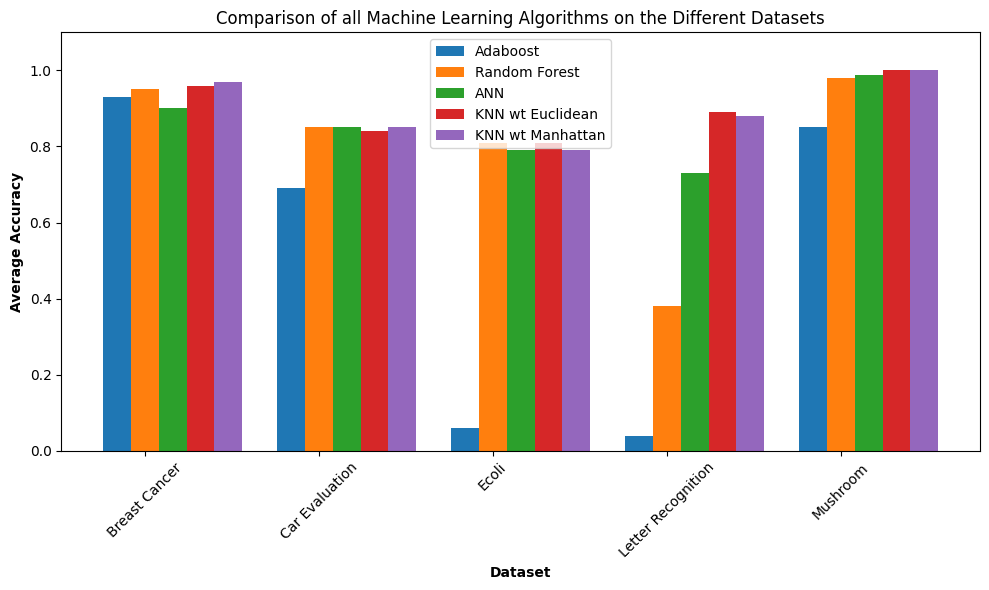

In [ ]:
# Let's simulate some data to represent the average accuracy of each algorithm on different datasets
import numpy as np
import matplotlib.pyplot as plt

# Names of algorithms
algorithms = ['Adaboost', 'Random Forest', 'ANN', 'KNN wt Euclidean', 'KNN wt Manhattan']

# Names of datasets
datasets = ['Breast Cancer', 'Car Evaluation', 'Ecoli', 'Letter Recognition', 'Mushroom']

# Simulated average accuracy for each algorithm on each dataset (values between 0 and 1)
accuracy_data = np.array([
    [0.93, 0.69, 0.06, 0.039, 0.85],  # Adaboost
    [0.95, 0.85, 0.81, 0.38, 0.98],  # Random Forest
    [0.90, 0.85, 0.79, 0.73, 0.987],  # ANN
    [0.96, 0.84, 0.81, 0.89, 1],   # KNN wt Euclidean
    [0.97, 0.85, 0.79, 0.88, 1]   # KNN wt Manhattan
])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Set position of bar on X axis
barWidth = 0.16
positions = np.arange(len(datasets))

# Make the plot
for i, algorithm in enumerate(algorithms):
    ax.bar(positions + i * barWidth, accuracy_data[i], width=barWidth, label=algorithm)

# Add xticks on the middle of the group bars
ax.set_xlabel('Dataset', fontweight='bold')
ax.set_ylabel('Average Accuracy', fontweight='bold')
ax.set_xticks([r + barWidth for r in range(len(datasets))])
ax.set_xticklabels(datasets)
ax.set_ylim(0, 1.1)

# Create legend & Show graphic
plt.xticks(rotation=45)
plt.title('Comparison of all Machine Learning Algorithms on the Different Datasets')
plt.legend()
plt.tight_layout()
plt.show()



In [ ]:
df.tail()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4
697,897471,4,8,8,5,4,5,10,4,1,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   1000025  698 non-null    int64 
 1   5        698 non-null    int64 
 2   1        698 non-null    int64 
 3   1.1      698 non-null    int64 
 4   1.2      698 non-null    int64 
 5   2        698 non-null    int64 
 6   1.3      698 non-null    object
 7   3        698 non-null    int64 
 8   1.4      698 non-null    int64 
 9   1.5      698 non-null    int64 
 10  2.1      698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [ ]:
df.describe()

,1000025,5,1,1.1,1.2,2,3,1.4,1.5,2.1
count,6.980000e+02,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,1.071807e+06,4.416905,3.137536,3.210602,2.809456,3.217765,3.438395,2.869628,1.590258,2.690544
std,6.175323e+05,2.817673,3.052575,2.972867,2.856606,2.215408,2.440056,3.055004,1.716162,0.951596
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.702582e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238354e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [ ]:
df.isnull()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
693,False,False,False,False,False,False,False,False,False,False,False
694,False,False,False,False,False,False,False,False,False,False,False
695,False,False,False,False,False,False,False,False,False,False,False
696,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df["2.1"].value_counts()

2.1
2    457
4    241
Name: count, dtype: int64

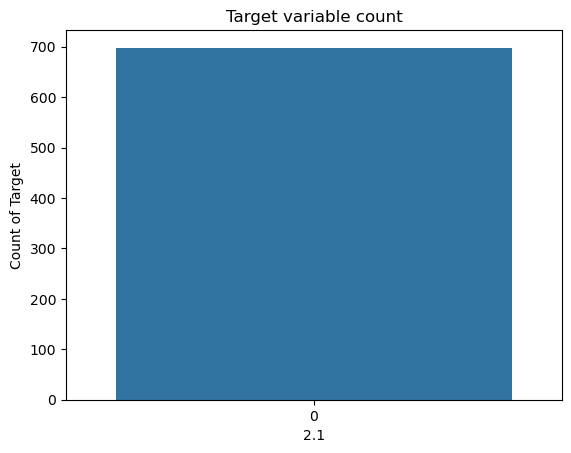

In [ ]:
sns.countplot(df["2.1"])
plt.xlabel('2.1')
plt.ylabel('Count of Target')
plt.title('Target variable count')
plt.show()

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
X.shape

(698, 10)

In [ ]:
y.shape

(698,)